## Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

## Ingesting input data.

Description : This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


In [2]:
house_prediction_input_data = pd.read_csv('Desktop/Ashwin/DS/Linear_Regression/House_price_prediction/kc_house_data.csv')
pd.set_option('display.max_columns', None)
house_prediction_input_data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Following is the column definition:
---------------------------------------------
id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
floors - Number of floors
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was initially built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Data Transformation

1.  Calculating the age of the property (This can be treated as quantitative variable)
2.  Calculating the timeframe since it was last renovated
3.  Assigning the categories based on the grade category metric
4.  Removing redundant columns


In [3]:

#---------------------- 1 ----------------------
current_year = 2021
number_of_years_since_renovated = []
house_prediction_input_data['Age'] = current_year - house_prediction_input_data['yr_built']


list_grade_category = []


#---------------------- 2 & 3 ------------------
for index, row in house_prediction_input_data.iterrows():
    
    if row['grade'] < 7:
        list_grade_category.append("Low_category")
    elif row['grade'] ==7:
        list_grade_category.append("Average_category")
    else:
        list_grade_category.append("High_category")
    
    if row['yr_renovated'] == 0 :
        number_of_years_since_renovated.append(row['Age'])
    else:
        number_of_years = int(current_year) - int(row['yr_renovated'])
        number_of_years_since_renovated.append(number_of_years)
        

house_prediction_input_data['grade_category'] = list_grade_category
house_prediction_input_data['years_since_renovated'] = number_of_years_since_renovated


#---------------------- 4 ----------------------
house_prediction_input_data1 = house_prediction_input_data.drop(columns=['yr_built','yr_renovated','id','date','grade','lat','long','zipcode'])
house_prediction_input_data1.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Age,grade_category,years_since_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1340,5650,66,Average_category,66
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,1690,7639,70,Average_category,30
2,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,2720,8062,88,Low_category,88
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,1360,5000,56,Average_category,56
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,1800,7503,34,High_category,34
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,3890,1530,4760,101930,20,High_category,20
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,1715,0,2238,6819,26,Average_category,26
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,1060,0,1650,9711,58,Average_category,58
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,1050,730,1780,8113,61,Average_category,61
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,1890,0,2390,7570,18,Average_category,18


## Plotting heatmap for correlation matrix 

<AxesSubplot:>

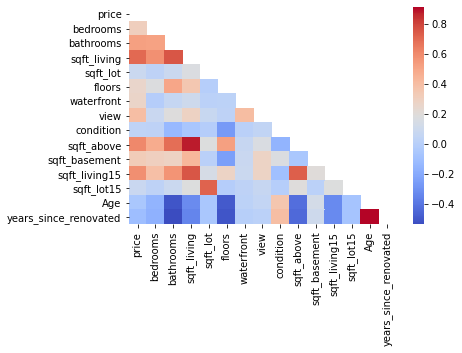

In [5]:
data = house_prediction_input_data1
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=False, mask=matrix , cmap= 'coolwarm')

#Note :  From the heat map we can conclude sqft_above - sqft_lot have the highest correlation
#        & Age - Years since rennovated

### Finding predictors with more than 0.8 correlation amongst each other
1. We will remove one metric of the predictor pair inorder to reduce the number of dimensions and assure non-collinearity in the predictors

In [6]:

correlation_matrix = house_prediction_input_data1.corr().abs()
correlation_matrix = correlation_matrix[abs(correlation_matrix) >= 0.01].stack().reset_index()
correlation_matrix = correlation_matrix[correlation_matrix['level_0'].astype(str)!=correlation_matrix['level_1'].astype(str)]
 
# filtering out lower/upper triangular duplicates : source(https://pydatascience.org/2019/07/23/remove-duplicates-from-correlation-matrix-python/) 

correlation_matrix['ordered-cols'] = correlation_matrix.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
correlation_matrix = correlation_matrix.drop_duplicates(['ordered-cols'])
correlation_matrix.drop(['ordered-cols'], axis=1, inplace=True)
 
top_correlated_metrics = correlation_matrix.sort_values(by=[0], ascending=False) #Get 10 highest correlation of pairwaise attributes

top_correlated_metrics = top_correlated_metrics.reset_index()
top_correlated_metrics = top_correlated_metrics.rename({0: 'corr_coef'}, axis=1)
top_correlated_metrics = top_correlated_metrics[top_correlated_metrics['corr_coef'] >= 0.8]

print(top_correlated_metrics)

# #Building a list of all metrics


top_correlated_metrics_list1 = set(top_correlated_metrics['level_0'].to_list())
top_correlated_metrics_list2 = set(top_correlated_metrics['level_1'].to_list())
top_correlated_metrics_list = set(list(top_correlated_metrics_list1) + list(top_correlated_metrics_list2))



print("\n\nTop Correlated metrics with more than 0.8 correlation :",top_correlated_metrics_list)


   index      level_0                level_1  corr_coef
0    200          Age  years_since_renovated   0.909924
1     53  sqft_living             sqft_above   0.876597


Top Correlated metrics with more than 0.8 correlation : {'sqft_above', 'years_since_renovated', 'sqft_living', 'Age'}


In [7]:
#Removing predictors : sqft_above and years_since_rennovated
house_prediction_input_data2 = house_prediction_input_data1.drop(columns=['sqft_above','years_since_renovated'])

### Plotting scatterplots between each predictor and response variable in order to check if the data is linear

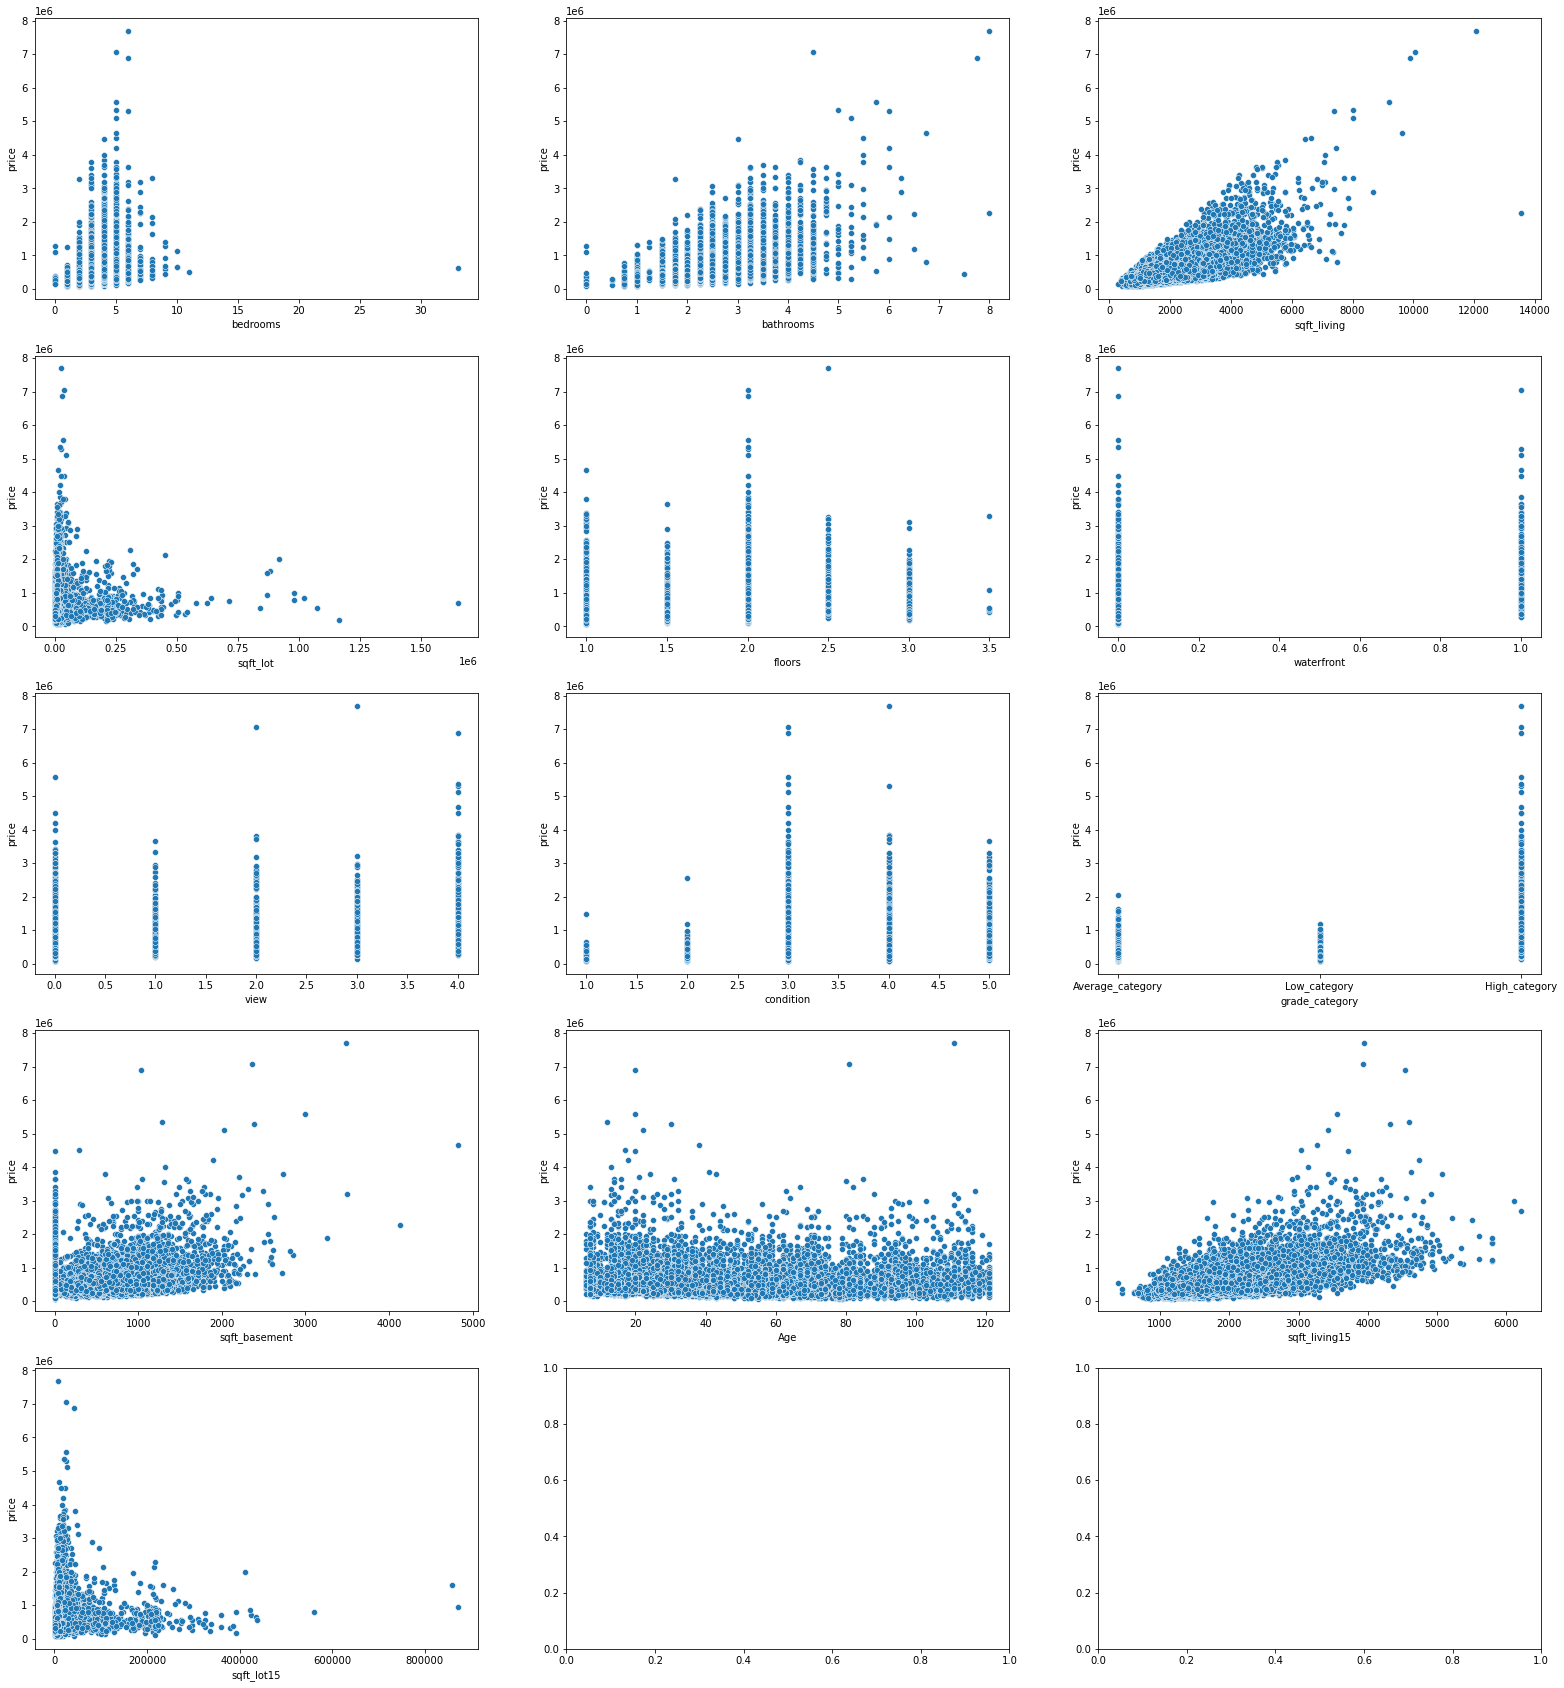

In [8]:
fig, ax= plt.subplots(figsize=(27,30), ncols=3, nrows=5)
sns.scatterplot(x="bedrooms", y="price",data=house_prediction_input_data2, ax=ax[0][0])
sns.scatterplot(x="bathrooms", y="price",data=house_prediction_input_data2, ax=ax[0][1])
sns.scatterplot(x="sqft_living", y="price",data=house_prediction_input_data2, ax=ax[0][2])
sns.scatterplot(x="sqft_lot", y="price",data=house_prediction_input_data2, ax=ax[1][0])
sns.scatterplot(x="floors", y="price",data=house_prediction_input_data2, ax=ax[1][1])
sns.scatterplot(x="waterfront", y="price",data=house_prediction_input_data2, ax=ax[1][2])
sns.scatterplot(x="view", y="price",data=house_prediction_input_data2, ax=ax[2][0])
sns.scatterplot(x="condition", y="price",data=house_prediction_input_data2, ax=ax[2][1])
sns.scatterplot(x="grade_category", y="price",data=house_prediction_input_data2, ax=ax[2][2])
sns.scatterplot(x="sqft_basement", y="price",data=house_prediction_input_data2, ax=ax[3][0])
sns.scatterplot(x="Age", y="price",data=house_prediction_input_data2, ax=ax[3][1])
sns.scatterplot(x="sqft_living15", y="price",data=house_prediction_input_data2, ax=ax[3][2])
sns.scatterplot(x="sqft_lot15", y="price",data=house_prediction_input_data2, ax=ax[4][0])
plt.show();


1. Removing all variables which don't have a linear relationship with the response variable
    a. Age (slope is close to 0 which means there is no significance of Age on price)
    b. waterfront (no clear relationship)
    c. view (no clear relationship)
    d. condition (no clear relationship)
    e. sqft_lot15 (looks like quadratic curve) 
    f. sqft_lot (looks like quadratic curve)

In [9]:
house_prediction_input_data3 = house_prediction_input_data2.drop(columns=['Age','waterfront','view','condition','sqft_lot15','sqft_lot'])
house_prediction_input_data3.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,sqft_basement,sqft_living15,grade_category
0,221900.0,3,1.00,1180,1.0,0,1340,Average_category
1,538000.0,3,2.25,2570,2.0,400,1690,Average_category
2,180000.0,2,1.00,770,1.0,0,2720,Low_category
3,604000.0,4,3.00,1960,1.0,910,1360,Average_category
4,510000.0,3,2.00,1680,1.0,0,1800,High_category
5,1225000.0,4,4.50,5420,1.0,1530,4760,High_category
6,257500.0,3,2.25,1715,2.0,0,2238,Average_category
7,291850.0,3,1.50,1060,1.0,0,1650,Average_category
8,229500.0,3,1.00,1780,1.0,730,1780,Average_category
9,323000.0,3,2.50,1890,2.0,0,2390,Average_category


#### Creating dummy variable for grade category in order to fit the linear model

In [10]:
grade_category_dummy = pd.get_dummies(data=house_prediction_input_data3['grade_category'],drop_first=True,prefix='grade') 
#drop first column to avoid dummy trap
house_prediction_input_data3.drop(['grade_category'],axis=1,inplace=True)
house_prediction_input_data4 = pd.concat([house_prediction_input_data3,grade_category_dummy],axis=1)
house_prediction_input_data4.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,sqft_basement,sqft_living15,grade_High_category,grade_Low_category
0,221900.0,3,1.00,1180,1.0,0,1340,0,0
1,538000.0,3,2.25,2570,2.0,400,1690,0,0
2,180000.0,2,1.00,770,1.0,0,2720,0,1
3,604000.0,4,3.00,1960,1.0,910,1360,0,0
4,510000.0,3,2.00,1680,1.0,0,1800,1,0
5,1225000.0,4,4.50,5420,1.0,1530,4760,1,0
6,257500.0,3,2.25,1715,2.0,0,2238,0,0
7,291850.0,3,1.50,1060,1.0,0,1650,0,0
8,229500.0,3,1.00,1780,1.0,730,1780,0,0
9,323000.0,3,2.50,1890,2.0,0,2390,0,0


### Plotting boxplot for all predictors and variables in order to find outliers

<AxesSubplot:xlabel='sqft_living15'>

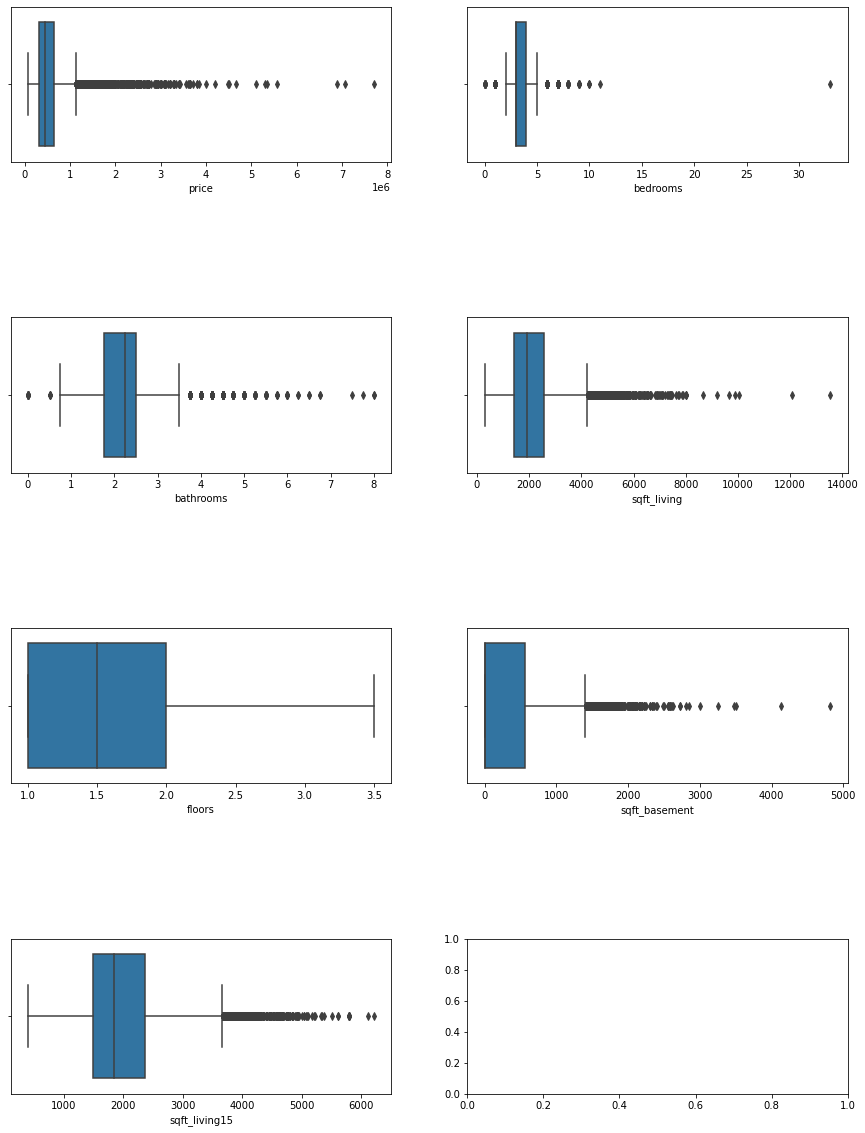

In [11]:
## Adjustments
f,ax=plt.subplots(figsize=(15, 20),nrows=4,ncols=2)
plt.subplots_adjust(hspace=1)
## Features
sns.boxplot(x = house_prediction_input_data4['price'],data=house_prediction_input_data4,ax=ax[0][0])
sns.boxplot(x = house_prediction_input_data4['bedrooms'],data=house_prediction_input_data4,ax=ax[0][1])
sns.boxplot(x = house_prediction_input_data4['bathrooms'],data=house_prediction_input_data4,ax=ax[1][0])
sns.boxplot(x = house_prediction_input_data4['sqft_living'],data=house_prediction_input_data4,ax=ax[1][1])
sns.boxplot(x = house_prediction_input_data4['floors'],data=house_prediction_input_data4,ax=ax[2][0])
sns.boxplot(x = house_prediction_input_data4['sqft_basement'],data=house_prediction_input_data4,ax=ax[2][1])
sns.boxplot(x = house_prediction_input_data4['sqft_living15'],data=house_prediction_input_data4,ax=ax[3][0])


### Building a function to remove outliers from the dataframe based on the interquartile range property

In [12]:
#Deleting values outside of interquartile ranges
def remove_outliers(df,attribute):
    q1 = df[attribute].quantile(0.25)
    q3 = df[attribute].quantile(0.75)
    iq = q3 - q1
    lower_limit = q1 - 1.5 * iq
    upper_limit = q3 + 1.5* iq
    df[attribute] = np.where(df[attribute]>upper_limit,upper_limit,df[attribute])
    df[attribute] = np.where(df[attribute]<lower_limit,lower_limit,df[attribute])
    return df


house_prediction_removing_outliers = remove_outliers(house_prediction_input_data4,"price")
house_prediction_removing_outliers = remove_outliers(house_prediction_removing_outliers,"bedrooms")
house_prediction_removing_outliers = remove_outliers(house_prediction_removing_outliers,"bathrooms")
house_prediction_removing_outliers = remove_outliers(house_prediction_removing_outliers,"sqft_living")
house_prediction_removing_outliers = remove_outliers(house_prediction_removing_outliers,"floors")
house_prediction_removing_outliers = remove_outliers(house_prediction_removing_outliers,"sqft_basement")
house_prediction_removing_outliers = remove_outliers(house_prediction_removing_outliers,"sqft_living15")
house_prediction_df = house_prediction_removing_outliers

### Plotting residual plots to make sure there isn't any pattern in the residuals which depict non-linearity


<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

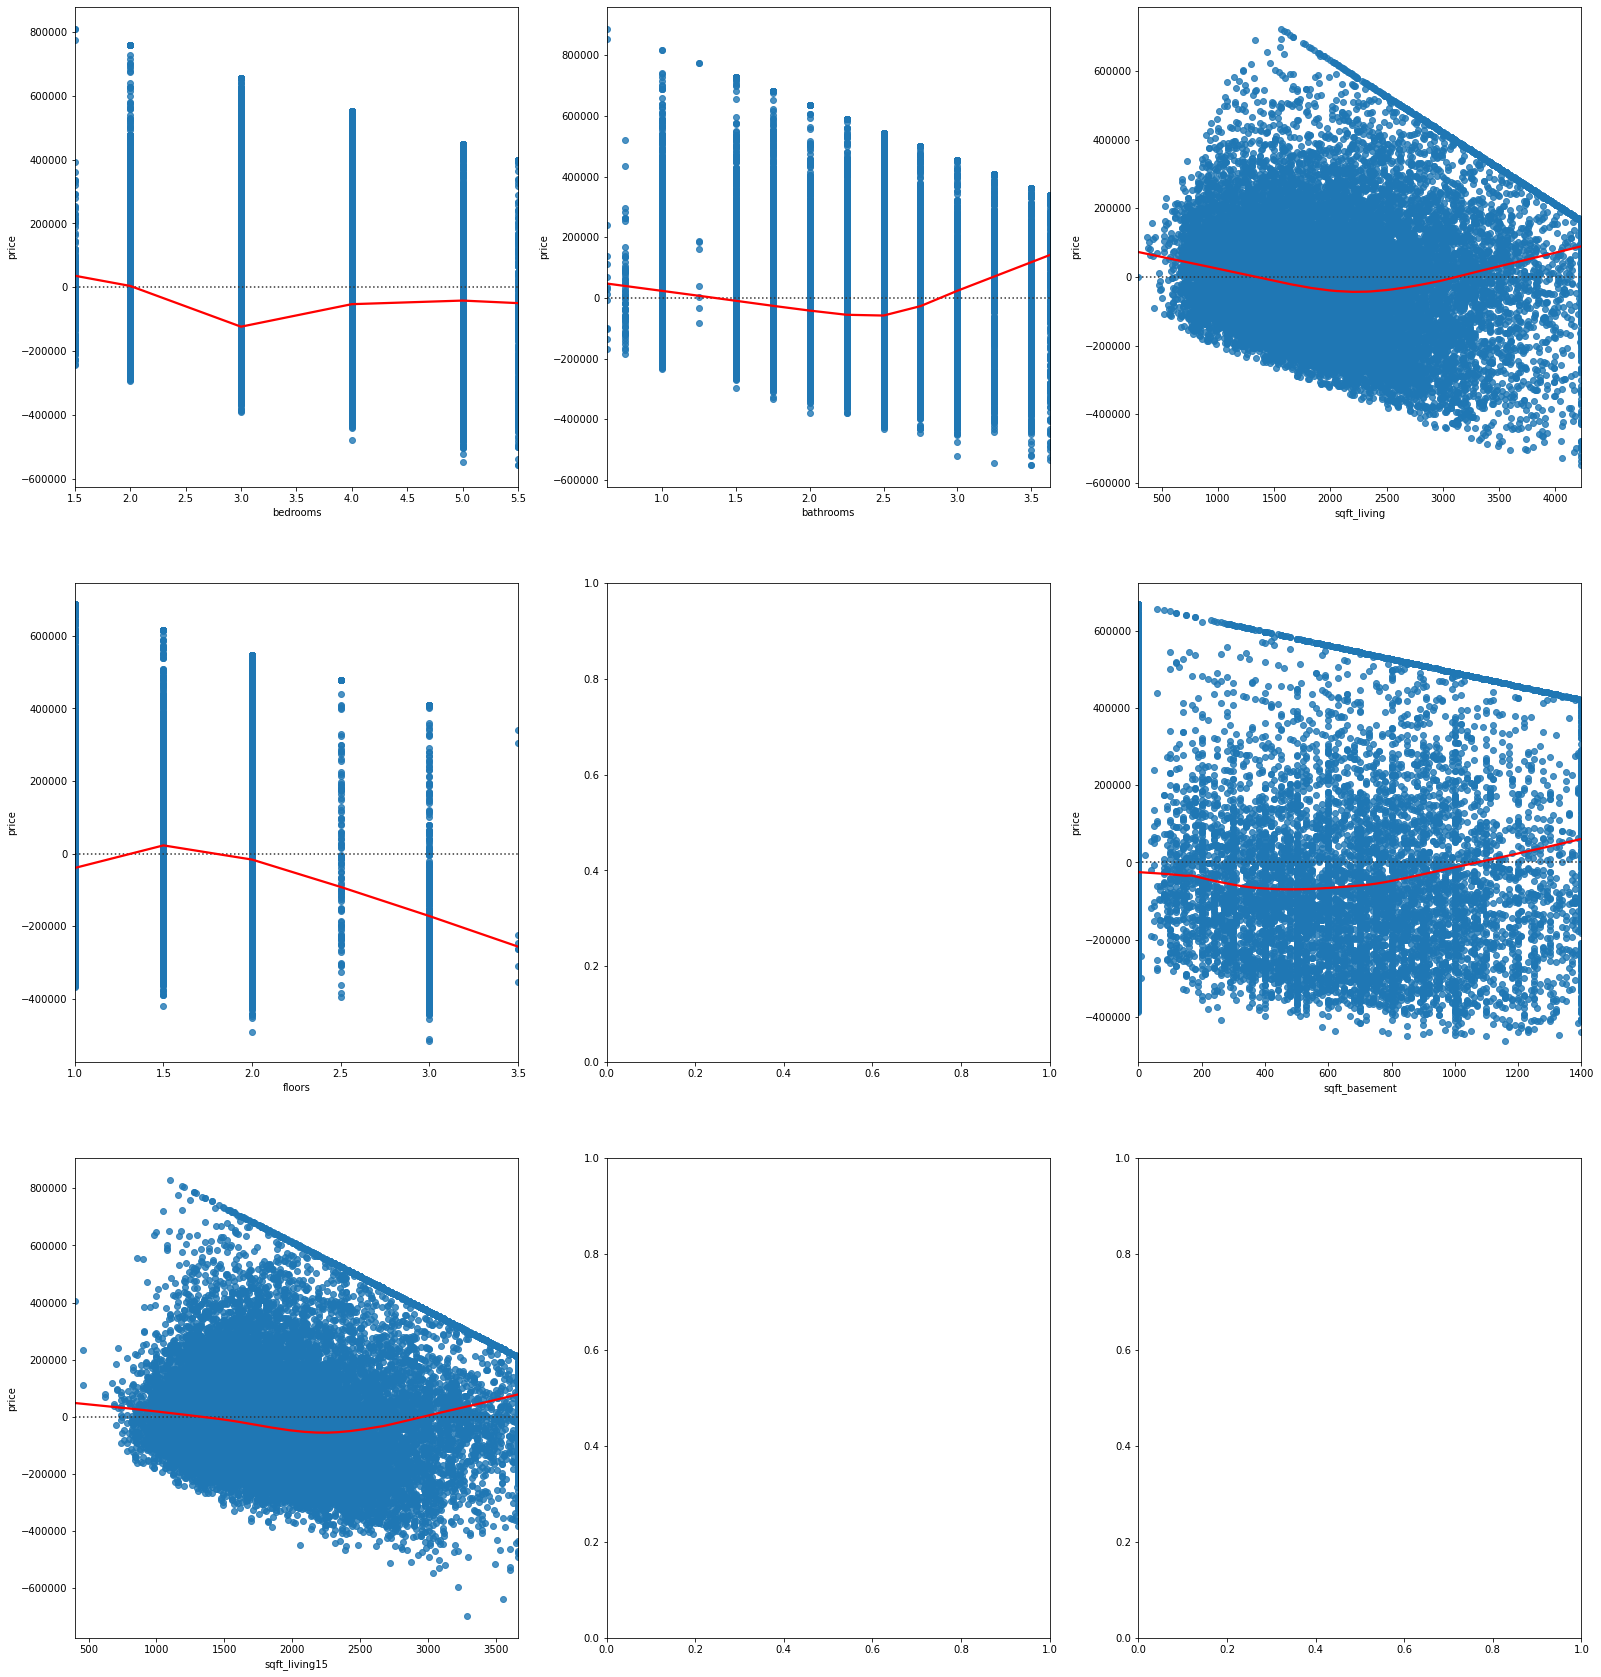

In [13]:
# Adjustment
df = house_prediction_df
fig, axs = plt.subplots(figsize=(27,30),nrows=3,ncols=3)
# Features 
sns.residplot(x=df["bedrooms"],y=df['price'],data=df,label='Residual',lowess=True,line_kws={'color': 'red'},ax=axs[0][0])
sns.residplot(x=df["bathrooms"],y=df['price'],data=df,label='Residual',lowess=True,line_kws={'color': 'red'},ax=axs[0][1])
sns.residplot(x=df["sqft_living"],y=df['price'],data=df,label='Residual',lowess=True,line_kws={'color': 'red'},ax=axs[0][2])
sns.residplot(x=df["floors"],y=df['price'],data=df,label='Residual',lowess=True,line_kws={'color': 'red'},ax=axs[1][0])
# sns.residplot(x=df["grade_High_category"],y=df['grade_High_category'],data=df,label='Residual',lowess=True,line_kws={'color': 'red'},ax=axs[1][1])
sns.residplot(x=df["sqft_basement"],y=df['price'],data=df,label='Residual',lowess=True,line_kws={'color': 'red'},ax=axs[1][2])
sns.residplot(x=df["sqft_living15"],y=df['price'],data=df,label='Residual',lowess=True,line_kws={'color': 'red'},ax=axs[2][0])

### Linear Regression
1. Creating two dataframes : One for predictors and the other for the response variable
2. Building training and testing data
3. Fiting the linear regression the model

In [14]:
#----------------- 1 -------------------------

X = house_prediction_df.drop(columns=['price']) 
Y = house_prediction_df['price']

#----------------- 2 -------------------------

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

#----------------- 3 -------------------------

regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
Y_pred = regr.predict(X_test)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 103146.10310203058
Coefficients: 
 [-2.65483119e+04 -1.89158621e+04  1.43296481e+02  3.03319508e+04
  6.60286682e+01  7.17729483e+01  8.33911846e+04 -2.10215764e+04]


In [15]:
r2 = r2_score(Y_test, Y_pred) 
print(r2)

0.5432543169453217


#### Comparing the model output by statsmodel library

In [16]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

house_price_model = sm.OLS(Y_train,X_train).fit()
house_price_predictions = house_price_model.predict(X_test)
print(house_price_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     2573.
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        01:20:02   Log-Likelihood:            -2.3268e+05
No. Observations:               17290   AIC:                         4.654e+05
Df Residuals:                   17281   BIC:                         4.654e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.031e+05   7

#### Currently the accuracy (R2) value of the model is 0.544 with all features in the model statistically significant

1. We can do various things to improve the model accuracy like :
    a. regularization  
    b. adding more features (which we removed in the earlier stages)
    c. Using trees and other machine learning models

### References used for building this script : 
1. https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices
2. https://www.kaggle.com/pouriapaimard/predicting-house-prices-in-king-county